In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from IPython.display import clear_output, display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from importlib import reload

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import scoobpsf
from scoobpsf.math_module import xp, _scipy
from scoobpsf.imshows import *
import scoobpsf.scoobi as scoobi

import lina
from lina.math_module import xp, _scipy

lina.math_module.update_np(np)
lina.math_module.update_scipy(scipy)

pupil_diam = 6.75*u.mm
wavelength_c = 632.8e-9*u.m

this worked
Succesfully initialized testbed interface.


In [5]:
images_fname = 'iefc-data/iefc_images_hadamard_20230905.fits'
dm_commands_fname = 'iefc-data/iefc_dm_commands_hadamard_20230905.fits'

images = fits.getdata(images_fname)
dm_commands = fits.getdata(dm_commands_fname)

In [7]:
images.shape 

(43, 256, 256)

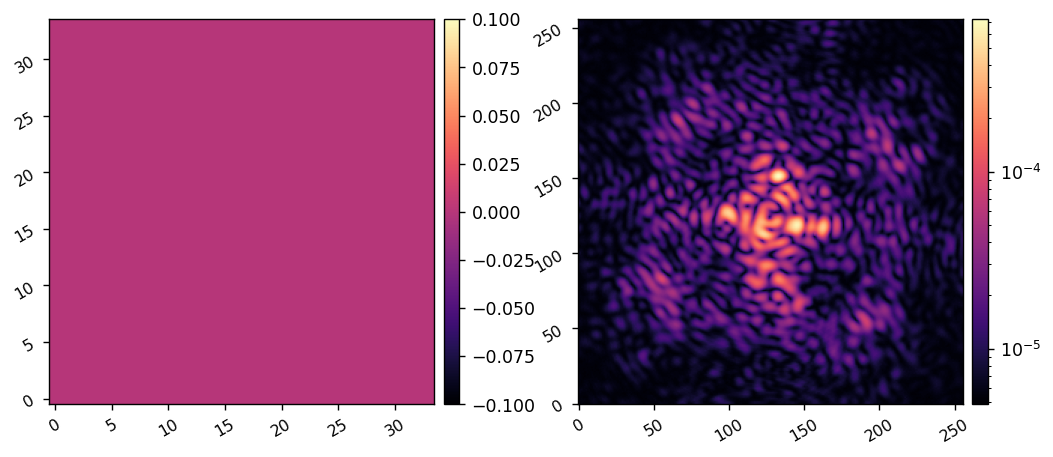

In [6]:
imshow2(dm_commands[0], images[0], lognorm2=True)

No OPD data implemented into model.


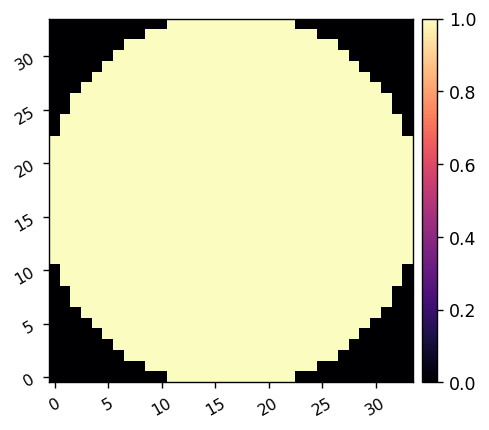

In [9]:
from scoobpsf import scoob
model = scoob.SCOOBM()
imshow1(model.dm_mask)

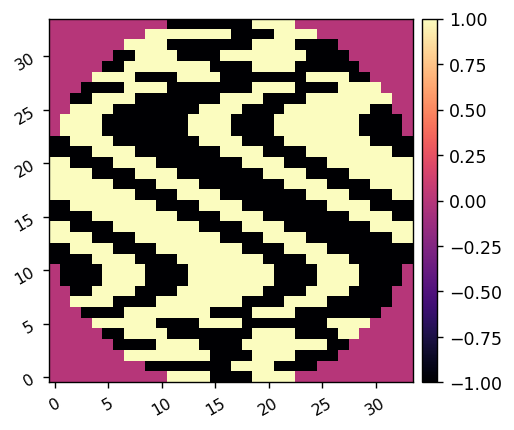

In [14]:
had_modes = lina.utils.create_hadamard_modes(model.dm_mask)
imshow1(had_modes[20].reshape(model.Nact, model.Nact))

In [16]:
psf_pixelscale_lamD = 1/5

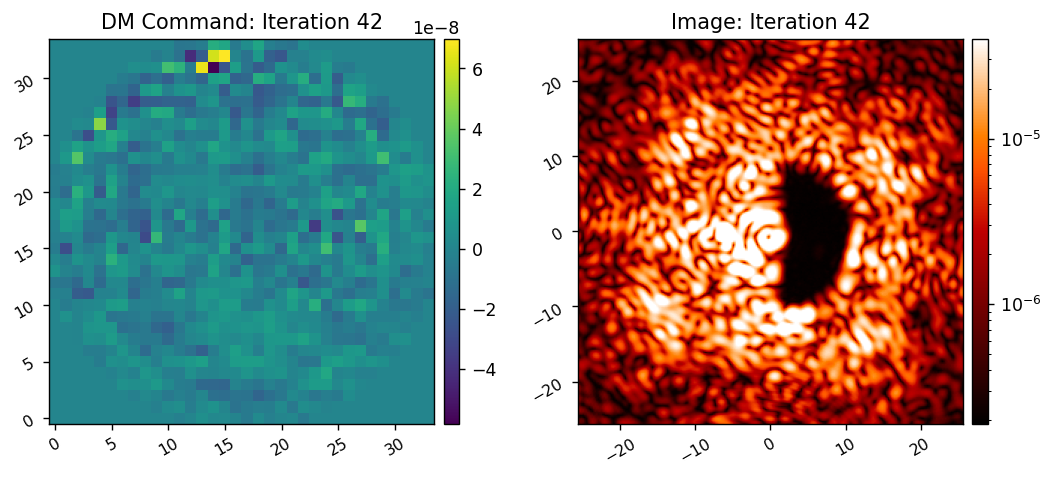

In [21]:
import time
for i in range(len(images)):
    imshow2(dm_commands[i], images[i], f'DM Command: Iteration {i}', f'Image: Iteration {i}',
            pxscl2=psf_pixelscale_lamD, 
            lognorm2=True, 
            cmap1='viridis', cmap2='gist_heat')
#     lina.utils.plot_radial_contrast(images[i], control_mask)
    time.sleep(0.2)
    clear_output(wait=True)

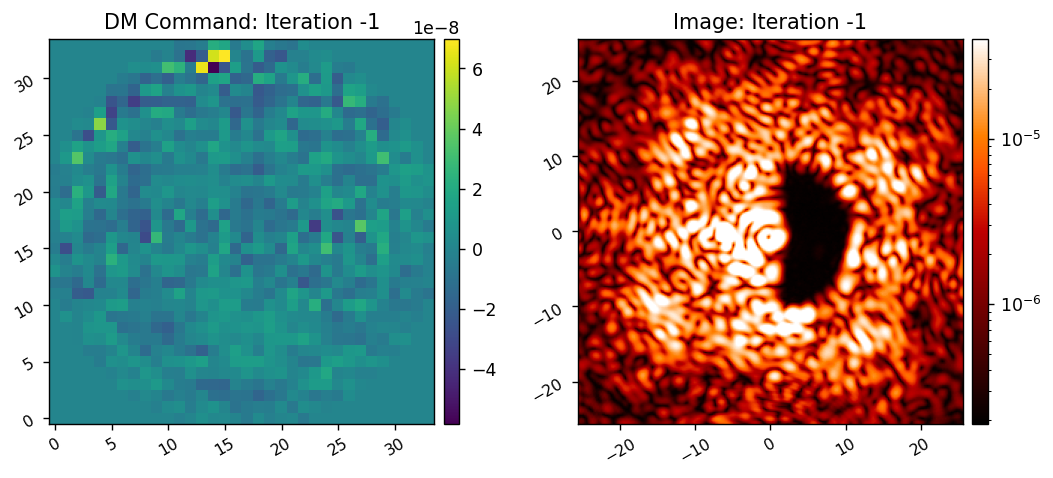

In [22]:
i = -1
imshow2(dm_commands[i], images[i], f'DM Command: Iteration {i}', f'Image: Iteration {i}',
        pxscl2=psf_pixelscale_lamD, 
        lognorm2=True, 
        cmap1='viridis', cmap2='gist_heat')